## DSA 610 Final Project: Data Exploring, Cleaning, and Analysis
### By Kevin Black

#### For this project, we will be exploring a dataset containing data on genetic mutations found in Pediatric Cancer Patients. We will explore the dataset using the skills learned in the DSA 610 course at Buffalo State University. In doing so, we will be performing any data cleaning necessary, creating visualizations, and using a few different Machine Learning models to predict the type of cancer in these patients.
<img src="peds_bear_2.jpg" style="width: 340px;"/>

#### The dataset can be found here: https://data.world/linkedbiodata/foundation-medicine-pediatric

#### Importing the dataset

In [1728]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [1729]:
df = pd.read_csv('peds_data.csv')
df.head()

,sampleId,variantType,gene,driverStatus,variantClass,proteinEffect,codon,transcript,position,variantInfo,study,gender,disease,diseaseSubType,assayVersion,age
0,2,CN,RICTOR,likely,amplification,amplification,NaN,NM_152756,chr5:38960567.0,CN:7,PEDIATRIC,M,CARCINOMA,Lung,v1,18
1,3,SV,CTNNB1,likely,point,S45F,45.0,NM_001904,chr3:41266137,AF:0.36; DP:2151,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
2,3,SV,APC,likely,truncation,S1315fs*3,1315.0,none,chr5:112175234,AF:0.37; DP:1650,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
3,3,SV,NF1,likely,truncation,G638*,638.0,NM_001042492,chr17:29552179,AF:0.6; DP:971,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
4,3,SV,TP53,likely,truncation,C135fs*14,135.0,NM_000546,chr17:7578530,AF:0.75; DP:956,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10


#### Exploring and Cleaning

In [1730]:
df.shape

(3006, 16)

In [1731]:
df.describe()

,sampleId,codon,age
count,3006.000000,1661.000000,3006.000000
mean,658.600798,644.617098,10.355622
std,340.399508,725.019307,5.365721
min,2.000000,1.000000,0.000000
25%,373.000000,157.000000,6.000000
50%,683.000000,385.000000,11.000000
75%,960.000000,868.000000,15.000000
max,1215.000000,5282.000000,18.000000


In [1732]:
len(df.sampleId.unique())
# 1031 unique sample IDs

1031

In [1733]:
df.variantType.unique()

array(['CN', 'SV', 'RE'], dtype=object)

In [1734]:
len(df.gene.unique())
# 364 unique genes

364

In [1735]:
df.driverStatus.unique()
# only 1 value, we can DROP this column

array(['likely'], dtype=object)

In [1736]:
df = df.drop('driverStatus', axis=1)

In [1737]:
df.variantClass.unique()

array(['amplification', 'point', 'truncation', 'rearrangement',
       'deletion'], dtype=object)

In [1738]:
df.proteinEffect.unique()
# 1506 unique protein effects
# these values look like they may complicate our project, so we will drop this column

array(['amplification', 'S45F', 'S1315fs*3', ..., 'Y127C', 'A1742fs*56',
       'F1736_M1737insMYVAAPPAQLHF'], dtype=object)

In [1739]:
df = df.drop('proteinEffect', axis=1)

In [1740]:
df.codon.dtype

dtype('float64')

In [1741]:
df.transcript.unique()
# there are "none" values here.


array(['NM_152756', 'NM_001904', 'none', 'NM_001042492', 'NM_000546',
       'NM_002524', 'NM_000051', 'NM_004439', 'NM_000077', 'NM_001706',
       'NM_000321', 'NM_002253', 'NM_000222', 'NM_006206', 'NM_000075',
       'NM_002392', 'NM_004936', 'NM_182763', 'NM_023110', 'NM_053056',
       'NM_003073', 'NM_033632', 'NM_002839', 'NM_004333', 'NM_000314',
       'NM_000264', 'NM_001238', 'NM_000245', 'NM_006218', 'NM_002049',
       'NM_000135', 'NM_005378', 'NM_004304', 'NM_000489', 'NM_000455',
       'NM_017617', 'NM_000179', 'NM_006015', 'NM_000038', 'NM_000548',
       'NM_005117', 'NM_005247', 'NM_002007', 'NM_002393', 'NM_005376',
       'NM_003482', 'NM_018557', 'NM_020529', 'NM_003317', 'NM_000268',
       'NM_002834', 'NM_024052', 'NM_004465', 'NM_001136017', 'NM_004380',
       'NM_005235', 'NM_004985', 'NM_001184', 'NM_001350', 'NM_000249',
       'NM_006311', 'NM_006182', 'NM_001754', 'NM_005921', 'NM_015338',
       'NM_000059', 'NM_003224', 'NM_005188', 'NM_004456', 'NM_

In [1742]:
len(df[df['transcript'] == 'none'])
# 354 'none' values total.
# Let's change them to null values

354

In [1743]:
df.transcript[df.transcript=='none']=np.nan
df.head(10)

C:\Users\kjbla\AppData\Local\Temp\ipykernel_50348\1184830382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sampleId,variantType,gene,variantClass,codon,transcript,position,variantInfo,study,gender,disease,diseaseSubType,assayVersion,age
0,2,CN,RICTOR,amplification,NaN,NM_152756,chr5:38960567.0,CN:7,PEDIATRIC,M,CARCINOMA,Lung,v1,18
1,3,SV,CTNNB1,point,45.0,NM_001904,chr3:41266137,AF:0.36; DP:2151,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
2,3,SV,APC,truncation,1315.0,NaN,chr5:112175234,AF:0.37; DP:1650,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
3,3,SV,NF1,truncation,638.0,NM_001042492,chr17:29552179,AF:0.6; DP:971,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
4,3,SV,TP53,truncation,135.0,NM_000546,chr17:7578530,AF:0.75; DP:956,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
5,4,RE,EWSR1,rearrangement,NaN,NaN,chr22:29688419,SR:341,PEDIATRIC,M,SARCOMA,Ewing,v1,15
6,5,RE,CDKN2A,truncation,NaN,NaN,chr9:21988840,SR:142,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,18
7,5,SV,NRAS,point,61.0,NM_002524,chr1:115256530,AF:0.13; DP:324,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,18
8,5,SV,ATM,truncation,384.0,NM_000051,chr11:108119746,AF:0.06; DP:424,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,18
9,5,SV,NRAS,point,50.0,NM_002524,chr1:115256562,AF:0.17; DP:323,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,18


In [1744]:
# for 'position' domain knowledge comes into play. I'm fairly confident 'chr' stands for 'chromosome'
# There are 23 chromosomes in total in human genetics, so we'll see if we're correct in the end
# the numbers after the ":" are tricky because we don't know what they stand for, but we can at least use this data
#to create a column called "chromosome". Let's try it.

df['chromosome'] = df['position'].str.split(':').str[0].str.replace('chr', '')

In [1745]:
df.head()

,sampleId,variantType,gene,variantClass,codon,transcript,position,variantInfo,study,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,NaN,NM_152756,chr5:38960567.0,CN:7,PEDIATRIC,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,45.0,NM_001904,chr3:41266137,AF:0.36; DP:2151,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10,3
2,3,SV,APC,truncation,1315.0,NaN,chr5:112175234,AF:0.37; DP:1650,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10,5
3,3,SV,NF1,truncation,638.0,NM_001042492,chr17:29552179,AF:0.6; DP:971,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,135.0,NM_000546,chr17:7578530,AF:0.75; DP:956,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10,17


In [1746]:
len(df.chromosome.unique())
# we see that there are 23 unique chromosomes, as we expected. we may be able to use this data in our analysis.

23

In [1747]:
df.chromosome.unique()
# using our domain knowledge again, we see we are misssing 23 but have X.
#the 23rd chromosome has values of XX or XY for female and male respectively, so we know this stands for the 23rd chromosome.

C:\Users\kjbla\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



array(['5', '3', '17', '22', '9', '1', '11', '4', '13', '12', '8', '7',
       '10', '19', 'X', '16', '2', '14', '6', '21', '20', '15', '18'],
      dtype=object)

In [1748]:
# we can get rid of the 'position' column now that we have extracted the values we want from it.
df = df.drop('position', axis=1)

In [1749]:
# variant info might be difficult to use because it contains so many different strings and numeric values in each record.
#we also don't know what some of them mean. For the first value, CN:7 likely means Cranial Nerve 7. However, other records
#have values such as AF and DP and this could overcomplicate things for the scope of this project.

df = df.drop('variantInfo', axis=1)

In [1750]:
df.study.unique()
# 'study' has just one value so we can DROP it.

array(['PEDIATRIC'], dtype=object)

In [1751]:
df = df.drop('study', axis=1)

In [1752]:
df

,sampleId,variantType,gene,variantClass,codon,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,NaN,NM_152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,45.0,NM_001904,F,CARCINOMA,Adrenal,v1,10,3
2,3,SV,APC,truncation,1315.0,NaN,F,CARCINOMA,Adrenal,v1,10,5
3,3,SV,NF1,truncation,638.0,NM_001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,135.0,NM_000546,F,CARCINOMA,Adrenal,v1,10,17
...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1214,SV,PIK3C2B,point,127.0,NM_002646,M,BRAIN,Glioblastoma,v5,7,1
3002,1215,CN,AURKA,amplification,NaN,NM_003600,F,SARCOMA,RMS,v1,4,20
3003,1215,SV,HRAS,point,13.0,NM_005343,F,SARCOMA,RMS,v1,4,11
3004,1215,SV,NOTCH1,truncation,1742.0,NM_017617,F,SARCOMA,RMS,v1,4,9


In [1753]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [1754]:
df.disease.unique()

array(['CARCINOMA', 'SARCOMA', 'HEME', 'BRAIN', 'EXTRACRANIAL EMBRYONAL',
       'GONADAL TUMORS'], dtype=object)

In [1755]:
len(df.diseaseSubType.unique())
# there may be more values here than we'd like for the purposes of this project

49

In [1756]:
df.assayVersion.unique()
# according to the definition, An assay is an investigative or analytic procedure for assessing or measuring the presence, 
#amount, or functional activity of a drug (the analyte).

array(['v1', 'v2', 'v3', 'v4', 'v5'], dtype=object)

In [1757]:
df.age.unique()
# ages range from 0 to 18

array([18, 10, 15,  4, 14, 17, 13, 11, 16,  0,  7,  5, 12,  3,  6,  1,  9,
        2,  8], dtype=int64)

#### Missing Values

In [1758]:
df.isna().sum()
# now that we've explored our variables, we know that there are no other null values labeled in an alternate way.

sampleId             0
variantType          0
gene                 0
variantClass         0
codon             1345
transcript         354
gender               0
disease              0
diseaseSubType       0
assayVersion         0
age                  0
chromosome           0
dtype: int64

In [1759]:
df.shape

(3006, 12)

In [1760]:
df.dropna().shape
# if we drop all of our null values we lose nearly half of our data. This goes against the max of 30% loss we learned in class.
# we need to either impute values or drop the columns

(1660, 12)

In [1761]:
df.head()

,sampleId,variantType,gene,variantClass,codon,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,NaN,NM_152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,45.0,NM_001904,F,CARCINOMA,Adrenal,v1,10,3
2,3,SV,APC,truncation,1315.0,NaN,F,CARCINOMA,Adrenal,v1,10,5
3,3,SV,NF1,truncation,638.0,NM_001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,135.0,NM_000546,F,CARCINOMA,Adrenal,v1,10,17


In [1762]:
# for 'codon', we could impute the mean, median or mode, or impute based on another variable, but this may not be
#the best course of action.

In [1763]:
df.corr()
# 'codon' doesn't seem to correlate well with age and there aren't many numeric variable to attempt correlation with.

,sampleId,codon,age
sampleId,1.000000,-0.017323,0.060816
codon,-0.017323,1.000000,-0.010314
age,0.060816,-0.010314,1.000000


In [1764]:
# Perhaps understanding the definition will help us decide what to do.
# definition of codon: a sequence of three nucleotides which together form a unit of genetic code in a DNA or RNA molecule.

In [1765]:
# in the end, nearly half of our dataset is missing the 'codon' variable, which leads me to decide the best course of action
#is to DROP this variable, rather than imputing.
df = df.drop('codon', axis=1)

In [1766]:
df.head()

,sampleId,variantType,gene,variantClass,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,NM_152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,NM_001904,F,CARCINOMA,Adrenal,v1,10,3
2,3,SV,APC,truncation,NaN,F,CARCINOMA,Adrenal,v1,10,5
3,3,SV,NF1,truncation,NM_001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,NM_000546,F,CARCINOMA,Adrenal,v1,10,17


In [1767]:
# next we need to make a decision on the null values in the 'transcript' column
# lets see how much of our dataset we lose if we remove the nulls
df.shape

(3006, 11)

In [1768]:
df.dropna().shape

(2652, 11)

In [1769]:
print((3006 - 2652) / 3006 * 100, '%')
# we lose 11.8% of our data, which is well below the 30% mark.
# Therefore, we will drop the nulls
df = df.dropna()

11.776447105788424 %


In [1770]:
df.transcript.unique()

array(['NM_152756', 'NM_001904', 'NM_001042492', 'NM_000546', 'NM_002524',
       'NM_000051', 'NM_004439', 'NM_000077', 'NM_001706', 'NM_000321',
       'NM_002253', 'NM_000222', 'NM_006206', 'NM_000075', 'NM_002392',
       'NM_004936', 'NM_182763', 'NM_023110', 'NM_053056', 'NM_003073',
       'NM_033632', 'NM_002839', 'NM_004333', 'NM_000314', 'NM_000264',
       'NM_001238', 'NM_000245', 'NM_006218', 'NM_002049', 'NM_000135',
       'NM_005378', 'NM_004304', 'NM_000489', 'NM_000455', 'NM_017617',
       'NM_000179', 'NM_006015', 'NM_000038', 'NM_000548', 'NM_005117',
       'NM_005247', 'NM_002007', 'NM_002393', 'NM_005376', 'NM_003482',
       'NM_018557', 'NM_020529', 'NM_003317', 'NM_000268', 'NM_002834',
       'NM_024052', 'NM_004465', 'NM_001136017', 'NM_004380', 'NM_005235',
       'NM_004985', 'NM_001184', 'NM_001350', 'NM_000249', 'NM_006311',
       'NM_006182', 'NM_001754', 'NM_005921', 'NM_015338', 'NM_000059',
       'NM_003224', 'NM_005188', 'NM_004456', 'NM_032458',

In [1771]:
len(df[df['transcript'].str.startswith('NM')])

2652

In [1772]:
# note that all values begin with NM. What does it mean?
# Definition: NM stands for Neutrophil Migration, which is a Genetic Locus.
# lets remove it since it's the same for all.

In [1773]:
df

,sampleId,variantType,gene,variantClass,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,NM_152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,NM_001904,F,CARCINOMA,Adrenal,v1,10,3
3,3,SV,NF1,truncation,NM_001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,NM_000546,F,CARCINOMA,Adrenal,v1,10,17
7,5,SV,NRAS,point,NM_002524,M,SARCOMA,Soft tissue (NOS),v1,18,1
...,...,...,...,...,...,...,...,...,...,...,...
3001,1214,SV,PIK3C2B,point,NM_002646,M,BRAIN,Glioblastoma,v5,7,1
3002,1215,CN,AURKA,amplification,NM_003600,F,SARCOMA,RMS,v1,4,20
3003,1215,SV,HRAS,point,NM_005343,F,SARCOMA,RMS,v1,4,11
3004,1215,SV,NOTCH1,truncation,NM_017617,F,SARCOMA,RMS,v1,4,9


In [1774]:
df['transcript'] = df['transcript'].str.replace('NM_', '')

In [1775]:
df.head()

,sampleId,variantType,gene,variantClass,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,001904,F,CARCINOMA,Adrenal,v1,10,3
3,3,SV,NF1,truncation,001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,000546,F,CARCINOMA,Adrenal,v1,10,17
7,5,SV,NRAS,point,002524,M,SARCOMA,Soft tissue (NOS),v1,18,1


In [1776]:
len(df.transcript.unique())

338

In [1777]:
# our data appears to be cleaned for now. We can always make further adjustments if needed during our analysis.

#### Analysis

In [1778]:
# in order to complete analysis, we need to create some dummy variables for some categorical variables.
# we should do this for variables that have a smaller number of unique values (variantClass, )

In [1779]:
df.variantType.unique()
# this is very interesting. earlier, when we looked at the unique values for 'variantType', we had a 3rd unique value, "RE".

array(['CN', 'SV'], dtype=object)

In [1780]:
# lets reload our uncleaned dataset and look at this relationship
df_uncleaned = pd.read_csv('peds_data.csv')
df_uncleaned.head()

,sampleId,variantType,gene,driverStatus,variantClass,proteinEffect,codon,transcript,position,variantInfo,study,gender,disease,diseaseSubType,assayVersion,age
0,2,CN,RICTOR,likely,amplification,amplification,NaN,NM_152756,chr5:38960567.0,CN:7,PEDIATRIC,M,CARCINOMA,Lung,v1,18
1,3,SV,CTNNB1,likely,point,S45F,45.0,NM_001904,chr3:41266137,AF:0.36; DP:2151,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
2,3,SV,APC,likely,truncation,S1315fs*3,1315.0,none,chr5:112175234,AF:0.37; DP:1650,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
3,3,SV,NF1,likely,truncation,G638*,638.0,NM_001042492,chr17:29552179,AF:0.6; DP:971,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10
4,3,SV,TP53,likely,truncation,C135fs*14,135.0,NM_000546,chr17:7578530,AF:0.75; DP:956,PEDIATRIC,F,CARCINOMA,Adrenal,v1,10


In [1781]:
df_uncleaned.variantType.unique()

array(['CN', 'SV', 'RE'], dtype=object)

In [1782]:
df_uncleaned[df_uncleaned['variantType'] == 'RE'].head(20)

,sampleId,variantType,gene,driverStatus,variantClass,proteinEffect,codon,transcript,position,variantInfo,study,gender,disease,diseaseSubType,assayVersion,age
5,4,RE,EWSR1,likely,rearrangement,EWSR1-FLI1 fusion,NaN,none,chr22:29688419,SR:341,PEDIATRIC,M,SARCOMA,Ewing,v1,15
6,5,RE,CDKN2A,likely,truncation,CDKN2A truncation,NaN,none,chr9:21988840,SR:142,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,18
31,21,RE,EWSR1,likely,truncation,EWSR1 truncation,NaN,none,chr22:29694153,SR:129,PEDIATRIC,M,SARCOMA,Ewing,v1,13
34,24,RE,TP53,likely,truncation,TP53 truncation,NaN,none,chr17:7577044,SR:13,PEDIATRIC,M,SARCOMA,Soft tissue (NOS),v1,16
37,26,RE,MLL,likely,truncation,MLL truncation,NaN,none,chr11:118366995,SR:129,PEDIATRIC,M,HEME,ALL,v1,14
41,27,RE,EWSR1,likely,rearrangement,EWSR1-FLI1 fusion,NaN,none,chr22:29685256,SR:259,PEDIATRIC,M,SARCOMA,Ewing,v1,7
78,53,RE,ALK,likely,rearrangement,ALK-PPM1B rearrangement,NaN,none,chr2:29446639,SR:94,PEDIATRIC,M,CARCINOMA,Lung,v2,15
82,55,RE,ETV6,likely,rearrangement,ETV6-EP300 fusion,NaN,none,chr12:12023071,SR:532,PEDIATRIC,M,HEME,AML,v2,7
122,70,RE,ALK,likely,rearrangement,ALK-NPM1 fusion,NaN,none,chr2:29447125,SR:250,PEDIATRIC,F,HEME,Lymphoma,v2,17
125,72,RE,BRAF,likely,rearrangement,BRAF-KIAA1549 fusion,NaN,none,chr7:140489335,SR:70,PEDIATRIC,F,BRAIN,Glioma,v2,1


In [1783]:
df_uncleaned[df_uncleaned['variantType'] == 'RE']['transcript'].unique()

array(['none'], dtype=object)

In [1784]:
df_uncleaned[df_uncleaned['variantType'] == 'RE']['codon'].unique()

array([nan])

In [1785]:
# we can see that ALL variantType values of "RE" contain NULL values for both 'codon' and 'transcript'
# Therefore, when we removed them, we lost an entire category of variant types. This may create a bias in any analysis.

In [1786]:
df

,sampleId,variantType,gene,variantClass,transcript,gender,disease,diseaseSubType,assayVersion,age,chromosome
0,2,CN,RICTOR,amplification,152756,M,CARCINOMA,Lung,v1,18,5
1,3,SV,CTNNB1,point,001904,F,CARCINOMA,Adrenal,v1,10,3
3,3,SV,NF1,truncation,001042492,F,CARCINOMA,Adrenal,v1,10,17
4,3,SV,TP53,truncation,000546,F,CARCINOMA,Adrenal,v1,10,17
7,5,SV,NRAS,point,002524,M,SARCOMA,Soft tissue (NOS),v1,18,1
...,...,...,...,...,...,...,...,...,...,...,...
3001,1214,SV,PIK3C2B,point,002646,M,BRAIN,Glioblastoma,v5,7,1
3002,1215,CN,AURKA,amplification,003600,F,SARCOMA,RMS,v1,4,20
3003,1215,SV,HRAS,point,005343,F,SARCOMA,RMS,v1,4,11
3004,1215,SV,NOTCH1,truncation,017617,F,SARCOMA,RMS,v1,4,9


#### Plots

In [1787]:
fig = px.histogram(df, x="chromosome", color="gender", marginal="box", title = "Histogram of Chromosomes by Gender",
                   hover_data=df.columns)
fig.show()

In [1788]:
fig = px.histogram(df, x="age", color="gender", marginal="box", title = "Histogram of Age by Gender",
                   hover_data=df.columns)
fig.show()

In [1789]:
fig = px.histogram(df, x="age", color="disease", marginal="box", title = "Histogram of Age by Cancer Type",
                   hover_data=df.columns)
fig.show()

In [1790]:
fig = px.histogram(df, x="variantType", color="gender", title = "Histogram of Age by Cancer Type",
                   hover_data=df.columns)
fig.show()

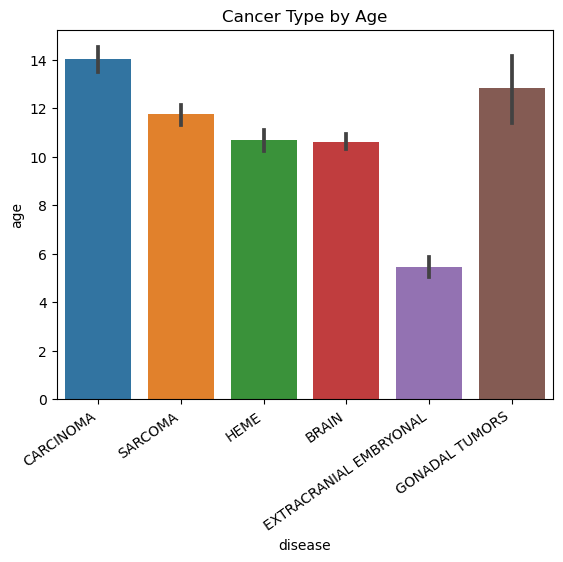

In [1791]:
chart = sns.barplot(data = df, x='disease', y='age')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
chart.set(title = 'Cancer Type by Age')
plt.show()

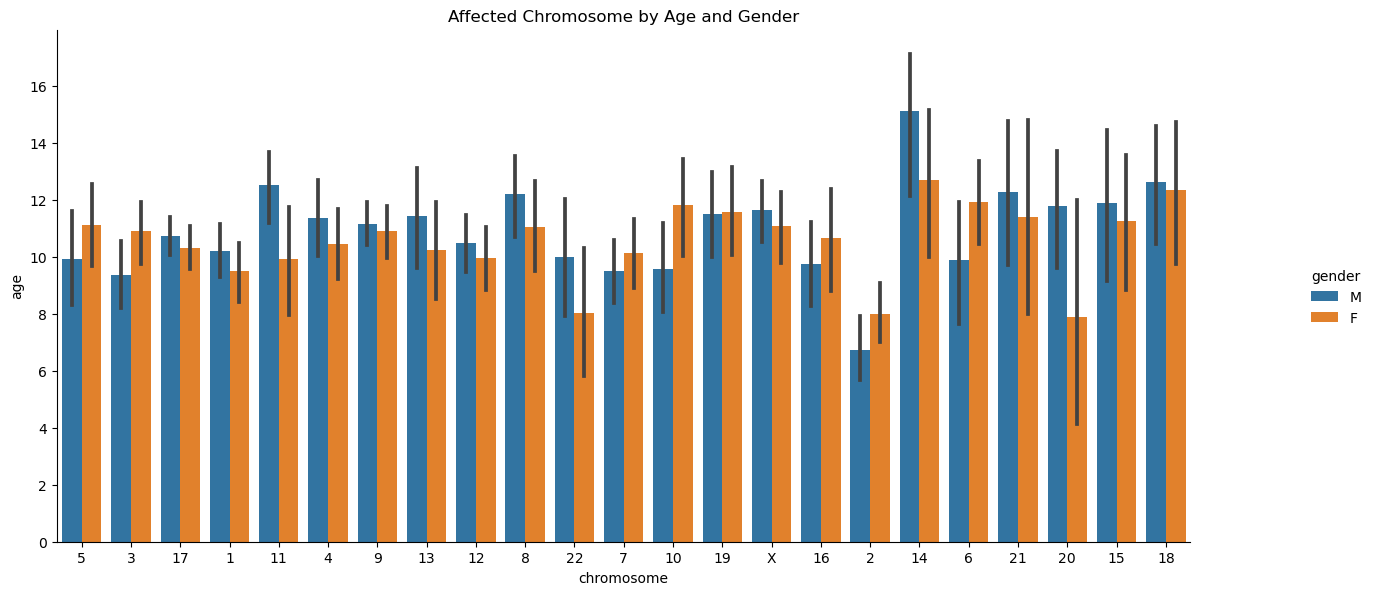

In [1792]:
chart = sns.catplot(data=df, x="chromosome", y="age", hue="gender", kind="bar")
chart.fig.set_size_inches(15,6)
chart.set(title='Affected Chromosome by Age and Gender')
plt.show()

In [1793]:
fig = px.histogram(df, x="transcript" , title = "Histogram of Transcript ID",
                   hover_data=df.columns)
fig.show()

In [1794]:
len(df[df['transcript'].isin(['000546', '000077', '004936', '005378', '004985'])])

577

In [1795]:
len(df[~df['transcript'].isin(['000546', '000077', '004936', '005378', '004985'])])

2075

In [1796]:
df.chromosome.dtype

dtype('O')

In [1797]:
df.dtypes

sampleId           int64
variantType       object
gene              object
variantClass      object
transcript        object
gender            object
disease           object
diseaseSubType    object
assayVersion      object
age                int64
chromosome        object
dtype: object

In [1798]:
df['chromosome'] = df['chromosome'].replace('X', '23')

In [1799]:
df['chromosome'] = df['chromosome'].astype(int)

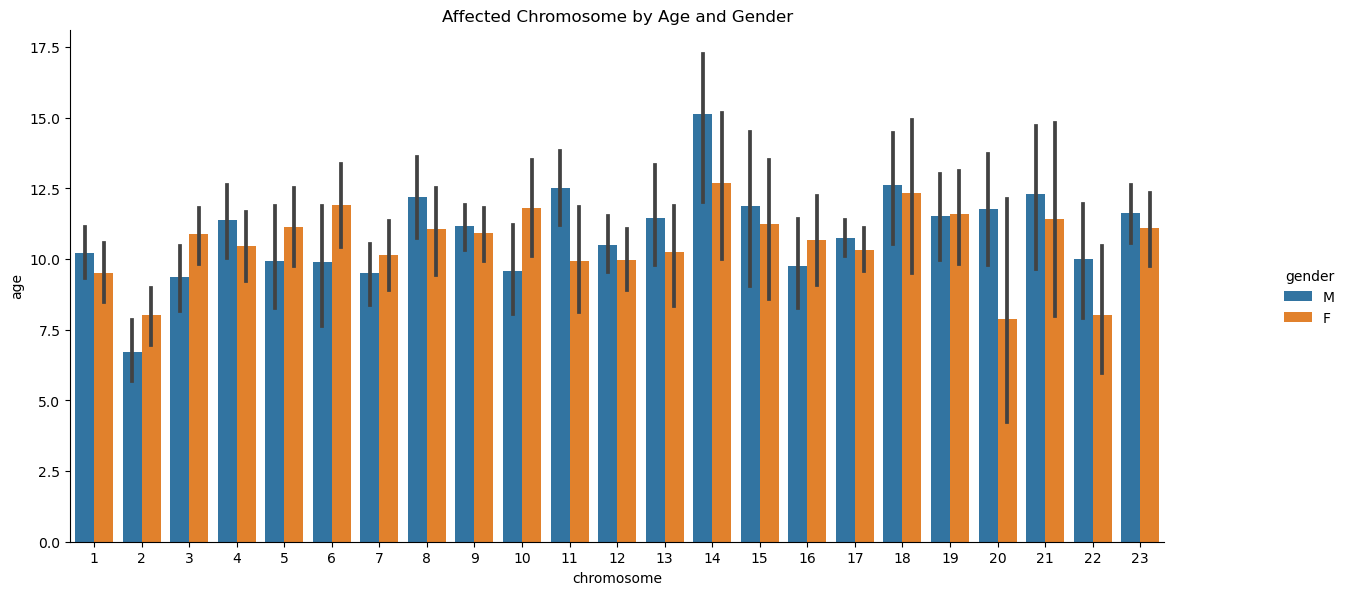

In [1800]:
chart = sns.catplot(data=df, x="chromosome", y="age", hue="gender", kind="bar")
chart.fig.set_size_inches(15,6)
chart.set(title='Affected Chromosome by Age and Gender')
plt.show()

#### Creating Dummy Variables

In [1801]:
df2 = df

In [1802]:
df2 = pd.concat([df2, pd.get_dummies(df['gender'], prefix='gender', drop_first=True)], axis=1)
df2.drop(['gender'], axis=1, inplace=True)

In [1803]:
df2 = pd.concat([df2, pd.get_dummies(df['variantType'], prefix='variantType', drop_first=True)], axis=1)
df2.drop(['variantType'], axis=1, inplace=True)

In [1804]:
df2 = pd.concat([df2, pd.get_dummies(df['assayVersion'], prefix='assayVersion', drop_first=True)], axis=1)
df2.drop(['assayVersion'], axis=1, inplace=True)

In [1805]:
df2 = pd.concat([df2, pd.get_dummies(df['variantClass'], prefix='variantClass', drop_first=True)], axis=1)
df2.drop(['variantClass'], axis=1, inplace=True)

In [1806]:
### based on the 'transcript' histogram from earlier. 5 values occurring more than 50 times.
# 1 if it contains one of those 5 values, otherwise a 0.
df2['transcript_top_5'] = df2['transcript'].apply(lambda x: 1 if x in ['000546', '000077', '004936', '005378', '004985'] else 0)


In [1807]:
df2.head()

,sampleId,gene,transcript,disease,diseaseSubType,age,chromosome,gender_M,variantType_SV,assayVersion_v2,assayVersion_v3,assayVersion_v4,assayVersion_v5,variantClass_deletion,variantClass_point,variantClass_truncation,transcript_top_5
0,2,RICTOR,152756,CARCINOMA,Lung,18,5,1,0,0,0,0,0,0,0,0,0
1,3,CTNNB1,001904,CARCINOMA,Adrenal,10,3,0,1,0,0,0,0,0,1,0,0
3,3,NF1,001042492,CARCINOMA,Adrenal,10,17,0,1,0,0,0,0,0,0,1,0
4,3,TP53,000546,CARCINOMA,Adrenal,10,17,0,1,0,0,0,0,0,0,1,1
7,5,NRAS,002524,SARCOMA,Soft tissue (NOS),18,1,1,1,0,0,0,0,0,1,0,0


In [1808]:
df.diseaseSubType.unique()

array(['Lung', 'Adrenal', 'Soft tissue (NOS)', 'Lymphoma',
       'Leukemia (NOS)', 'Bone sarcoma', 'Glioblastoma', 'MPNST', 'PNET',
       'RMS', 'ASPS', 'Atypical Teratoid Rhaboid Tumor (ATRT)', 'ALL',
       'Synovial', 'Medulloblastoma', 'AML', 'Ependymoma',
       'Liver hepatoblastoma', 'Astrocytoma', 'Wilms tumor', 'Upper GI',
       'Neuroblastoma', 'Meningioma', 'Neuroendocrine', 'Ewing',
       'Lower GI', 'HCC', 'Hemangioma', 'DSRC', 'Unknown',
       'Ovarian/Testis', 'Panc/biliary', 'Fibromatosis',
       'Histiocytic neoplasm', 'Glioma', 'Soft tissue assorted',
       'Hemangioendothelioma', 'Head and neck', 'Fibrosarcoma', 'Other',
       'Gyn carcinoma', 'IMTs', 'MDS and/or MPN', 'Thyroid',
       'Ganglioglioma', 'Kidney', 'Angiosarcoma', 'MLL', 'FLO'],
      dtype=object)

#### Predicting Cancer Type ('disease')

In [1809]:
X = df2[['age', 'chromosome', 'gender_M', 'variantType_SV', 'assayVersion_v2', 'assayVersion_v3', 'assayVersion_v4', 'assayVersion_v5', 'variantClass_deletion', 'variantClass_point', 'variantClass_truncation', 'transcript_top_5']]
y = df2['disease']

In [1810]:
from sklearn.model_selection import train_test_split

In [1811]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [1812]:
X_train.head()

,age,chromosome,gender_M,variantType_SV,assayVersion_v2,assayVersion_v3,assayVersion_v4,assayVersion_v5,variantClass_deletion,variantClass_point,variantClass_truncation,transcript_top_5
417,12,4,0,1,0,1,0,0,0,0,1,0
2996,12,13,1,1,0,0,1,0,0,1,0,0
253,13,1,0,0,1,0,0,0,0,0,0,0
737,3,2,1,0,0,0,1,0,0,0,0,1
1669,18,7,1,1,0,0,0,1,0,1,0,0


In [1813]:
y_train.head()

417                       HEME
2996                      HEME
253                    SARCOMA
737     EXTRACRANIAL EMBRYONAL
1669                 CARCINOMA
Name: disease, dtype: object

#### Random Forest

In [1814]:
from sklearn.ensemble import RandomForestClassifier
## note Random Forests do not require our data to be scaled

In [1815]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1816]:
y_pred = rf_model.predict(X_test)

In [1817]:
from sklearn import metrics

In [1818]:
metrics.accuracy_score(y_test, y_pred)

0.6193467336683417

In [1819]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=5, scoring = "accuracy")
scores.mean()

0.4488014781650855

In [1820]:
importances = rf_model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X.columns
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) age                            0.358720
 2) chromosome                     0.261616
 3) assayVersion_v5                0.101399
 4) assayVersion_v4                0.073867
 5) gender_M                       0.050737
 6) transcript_top_5               0.034666
 7) variantType_SV                 0.030789
 8) variantClass_point             0.020982
 9) assayVersion_v2                0.020616
10) variantClass_deletion          0.016263
11) variantClass_truncation        0.016164
12) assayVersion_v3                0.014180


In [1821]:
df2.chromosome = df2.chromosome.astype('object')

In [1822]:
df2.dtypes

sampleId                    int64
gene                       object
transcript                 object
disease                    object
diseaseSubType             object
age                         int64
chromosome                 object
gender_M                    uint8
variantType_SV              uint8
assayVersion_v2             uint8
assayVersion_v3             uint8
assayVersion_v4             uint8
assayVersion_v5             uint8
variantClass_deletion       uint8
variantClass_point          uint8
variantClass_truncation     uint8
transcript_top_5            int64
dtype: object

In [1823]:
df2 = pd.concat([df2, pd.get_dummies(df2['chromosome'], prefix='c', drop_first=True)], axis=1)
df2.drop(['chromosome'], axis=1, inplace=True)

C:\Users\kjbla\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [1824]:
df2.columns

Index(['sampleId', 'gene', 'transcript', 'disease', 'diseaseSubType', 'age',
       'gender_M', 'variantType_SV', 'assayVersion_v2', 'assayVersion_v3',
       'assayVersion_v4', 'assayVersion_v5', 'variantClass_deletion',
       'variantClass_point', 'variantClass_truncation', 'transcript_top_5',
       'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11',
       'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20',
       'c_21', 'c_22', 'c_23'],
      dtype='object')

In [1825]:
X = df2[['age', 'gender_M', 'variantType_SV', 'assayVersion_v2', 'assayVersion_v3', 'assayVersion_v4', 'assayVersion_v5', 'variantClass_deletion', 'variantClass_point', 'variantClass_truncation', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'transcript_top_5']]
y = df2['disease']

In [1826]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [1827]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1828]:
y_pred = rf_model.predict(X_test)

In [1829]:
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", random_forest_accuracy)

Accuracy: 0.6092964824120602


In [1830]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=5, scoring = "accuracy")
scores

array([0.23728814, 0.4519774 , 0.51698113, 0.55660377, 0.5754717 ])

In [1831]:
scores.mean()

0.4676644280993497

#### Logistic Regression

In [1832]:
from sklearn.linear_model import LogisticRegression

In [1833]:
lr_model = LogisticRegression(random_state=0, max_iter=3000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [1834]:
y_pred = lr_model.predict(X_test)

In [1835]:
logistic_regression_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_regression_accuracy)

Accuracy: 0.5678391959798995


In [1836]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(random_state=0, max_iter=3000), X, y, cv=5, scoring = "accuracy")
scores

array([0.31638418, 0.5047081 , 0.65660377, 0.60377358, 0.64150943])

In [1837]:
scores.mean()

0.5445958142344455

In [1838]:
### Let's scale our data and see if it helps
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
lr_model.fit(X_scaled_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [1839]:
y_pred = lr_model.predict(X_scaled_test)

In [1840]:
logistic_regression_scaled_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_regression_scaled_accuracy)
### our accuracy improved, but only slightly

Accuracy: 0.5781544256120528


#### KNN

In [1841]:
from sklearn.neighbors import KNeighborsClassifier

In [1842]:
X = df2[['age', 'gender_M', 'variantType_SV', 'assayVersion_v2', 'assayVersion_v3', 'assayVersion_v4', 'assayVersion_v5', 'variantClass_deletion', 'variantClass_point', 'variantClass_truncation', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'transcript_top_5']]
y = df2['disease']

In [1843]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [1844]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [1845]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.5804020100502513


In [1846]:
# knn uses distances between points so we should use scaling. Lets see if it changes things.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
knn.fit(X_scaled_train, y_train)
y_pred = knn.predict(X_scaled_test)

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [1847]:
knn_scaled_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", knn_scaled_accuracy)


Accuracy: 0.5480225988700564


In [1848]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kjbla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Text(0, 0.5, 'Accuracy Score')

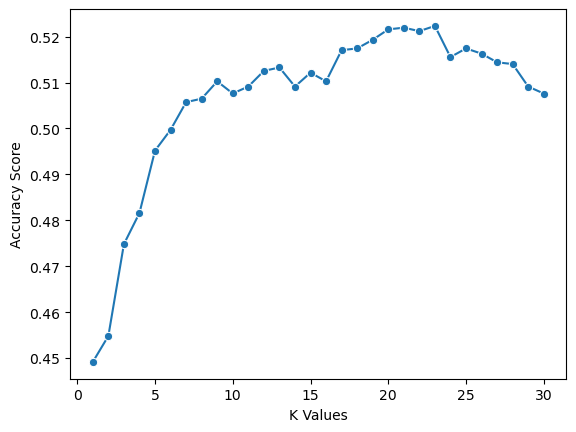

In [1849]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [1850]:
# perhaps we should've used a larger value for K. However, either way, it doesn't seem like our model becomes much more accurate.

In [1851]:
model_scores = {'ML Model': ['Random Forest', 'Logistic Regression', 'Scaled Logistic Regression', 'K Nearest Neighbors', 'Scaled K Nearest Neighbors'],
        'Accuracy Score': [random_forest_accuracy, logistic_regression_accuracy, logistic_regression_scaled_accuracy, knn_accuracy, knn_scaled_accuracy]
        }

model_scores_df = pd.DataFrame(model_scores)

model_scores_df

,ML Model,Accuracy Score
0,Random Forest,0.609296
1,Logistic Regression,0.567839
2,Scaled Logistic Regression,0.578154
3,K Nearest Neighbors,0.580402
4,Scaled K Nearest Neighbors,0.548023


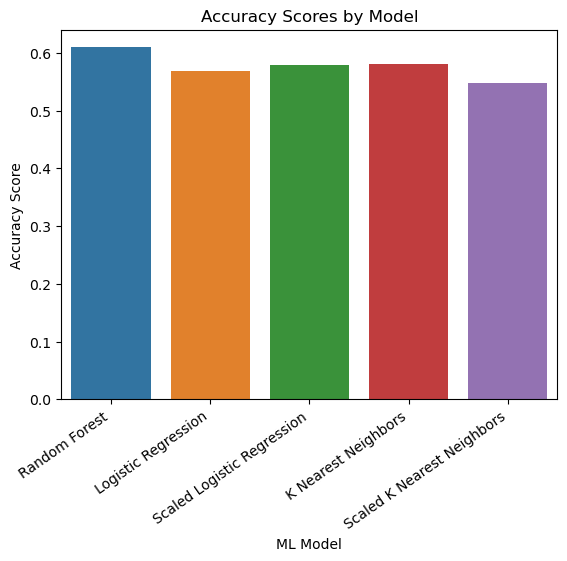

In [1852]:
chart = sns.barplot(data=model_scores_df, x='ML Model', y='Accuracy Score')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
chart.set(title = 'Accuracy Scores by Model')
plt.show()

### Questions? Feel free to contact me! 
#### email: blackk01@buffalostate.edu


### Thank you!